<center>

# Aprendizaje No Supervisado - DiploDatos

    Georgina Flesia y Laura Alonso Alemany
    
## Semi-supervisado y Self learning
    
Material basado en notas de Valeria Rulloni bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.




## Clasificación semisupervisada

La clasificación consiste en la asignación de una categoría a un objeto/individuo (o a varios) .

En cualquier problema de clasificación hay que identificar
* que cosas/objetos/individuos queremos clasificar,
* que datos (o variables medidas) tenemos de estos y
* cuáles (o cuántas) serían las (posibles) categorias o clases.

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento. Cuando además ya tenemos de antemano muestras no clasificadas y las consideramos en la clasificación lo llamamos **clasificación semisupervisada**

En esta notebook veremos **Clasificación semisupervisada dentro de una imagen**

## Clasificación en imágenes

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección de zonas)** o
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

Abordaremos



### Clasificación **dentro de una imagen**
$\leftrightarrow $ Segmentación

Dividir a la imagen en regiones. Los objetos/muestras a clasificar o agrupar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

### Imágenes:
Cada pixel tiene un vector de datos o características, puede tener una o más (características/datos).

**Ejemplo:** Imagen monocroma-> Un solo dato o valor por pixel

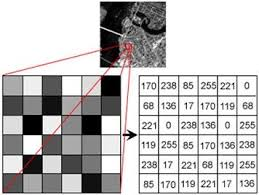



**Ejemplo:** imágenes a color RGB

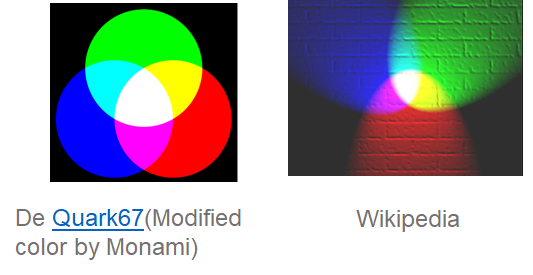

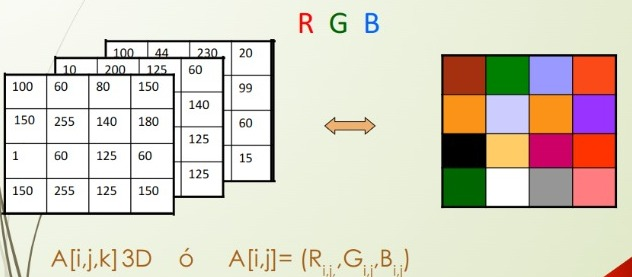

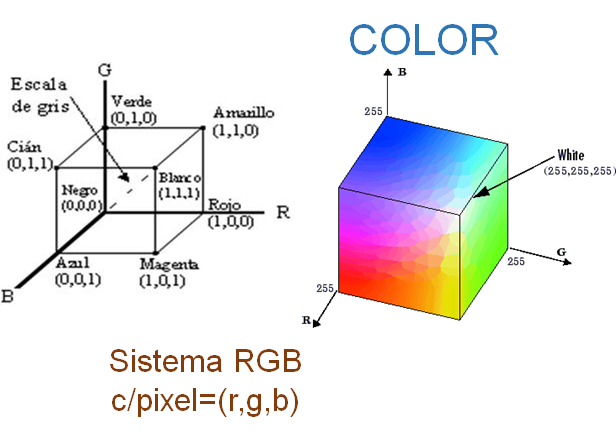

## Ejemplo

Inicializamos el entorno

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

usar la imagen 'Campo.png' de [link](https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/Campo.png)

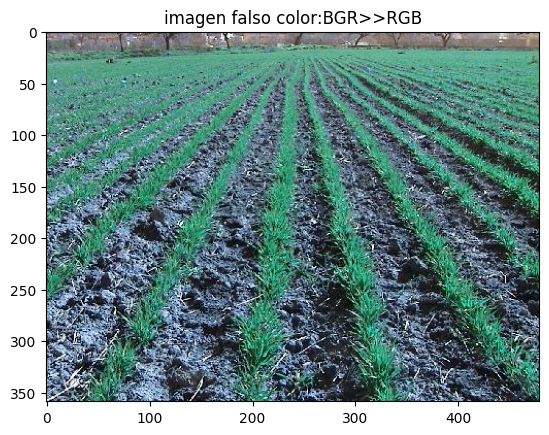

dimensiones: (359, 479, 3) el 3 es de tres canales:BGR


In [ ]:
#path='https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/Campo.png'
#path='https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/master/2021/Campo.png?raw=true'
#path="https://github.com/DiploDatos/AprendizajeNOSupervisado/blob/4b8e0e4834d0b8a9fdd061558882eac8aa16ae22/2021/Campo.png"
#path='https://drive.google.com/file/d/1zKmzhRmwpY6lfesQvfhGCXGD8fkcN02p/view?usp=sharing'
#path='/content/sample_data/Campo.png'
path='/content/Campo.png' # Primero hay que subir el archivo, pueden cambiarlo con la imagen que quieran
campo_cv=cv2.imread(path)
plt.imshow(campo_cv)
plt.title('imagen falso color:BGR>>RGB')
plt.show()
print('dimensiones:', campo_cv.shape, 'el 3 es de tres canales:BGR')

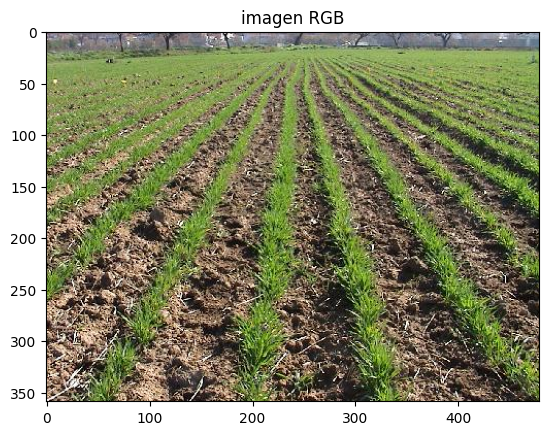

dimensiones: (359, 479, 3) el 3 es de tres canales:RGB


In [ ]:
campo= cv2.cvtColor(campo_cv, cv2.COLOR_BGR2RGB)
plt.imshow(campo)
plt.title('imagen RGB')
plt.show()
print('dimensiones:', campo.shape, 'el 3 es de tres canales:RGB')

In [ ]:
dims=campo.shape
cant_filas=dims[0]
cant_columnas=dims[1]
cant_pixeles=cant_filas*cant_columnas
print('dimensiones de la imagen: ', dims, 'es decir: ', cant_filas,'x',cant_columnas,' pixeles RGB')
print('cantidad de pixeles:', cant_pixeles)

dimensiones de la imagen:  (359, 479, 3) es decir:  359 x 479  pixeles RGB
cantidad de pixeles: 171961


In [ ]:
print(' pixel en el lugar(0,0):', campo[0,0,:])
print('componente roja(R) del pixel (0,0):', campo[0,0,0])
print('componente verde(G) del pixel (0,0):', campo[0,0,1])
print('tipo de datos: ', campo.dtype)

 pixel en el lugar(0,0): [186 155 161]
componente roja(R) del pixel (0,0): 186
componente verde(G) del pixel (0,0): 155
tipo de datos:  uint8


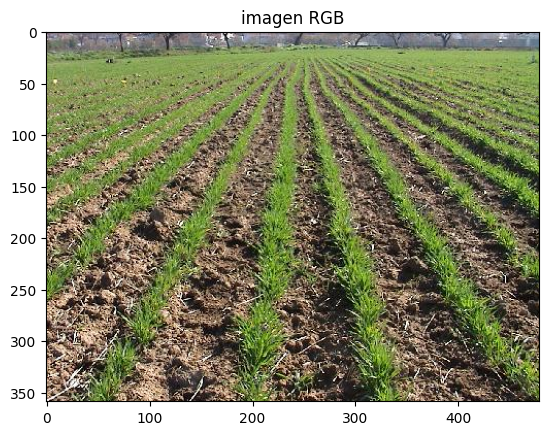

 pixel en el lugar(300,200): [ 60 100  29]


In [ ]:
plt.imshow(campo)
plt.title('imagen RGB')
plt.show()
print(' pixel en el lugar(300,200):', campo[300,200,:])

In [ ]:
print(' pixel en el lugar(300,150):', campo[300,150,:])

 pixel en el lugar(300,150): [162 130 107]


### RGB a Data Frame
**Pasemos los pixeles a Dataframe**
un pixel por fila, desarmamos la espacialidad

In [ ]:
data0=np.zeros([cant_pixeles,4],dtype='int')
data0[:,0]=np.arange(cant_pixeles)
data0[:,1]=np.ravel(campo[:,:,0])#rojo
data0[:,2]=np.ravel(campo[:,:,1])#verde
data0[:,3]=np.ravel(campo[:,:,2])#azul

df = pd.DataFrame(data0, columns=["pixel_id","rojo","verde","azul"])

print('Tamaño de Base de pixeles:', df.shape)
df.head()

Tamaño de Base de pixeles: (171961, 4)


pixel_id  rojo  verde  azul
0         0   186    155   161
1         1   202    171   176
2         2   190    159   165
3         3   203    172   177
4         4   189    160   164

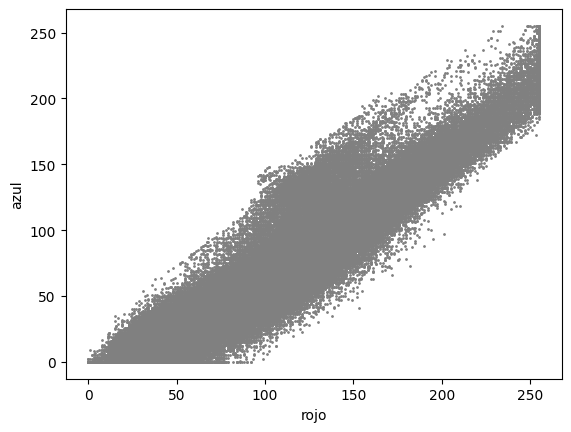

In [ ]:
#import matplotlib.patches as mpatches

variables=["rojo","verde","azul"]

variable1=variables[0]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

Notar la alta correlación entre las variables 'rojo, 'verde y 'azul' si elimino alguna estoy perdiendo información valiosa?

La causa latente de la correlación aparentemente es la intensidad global (claro-oscuro, más o menos luz en general) de los pixeles

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()


<Figure size 640x480 with 0 Axes>

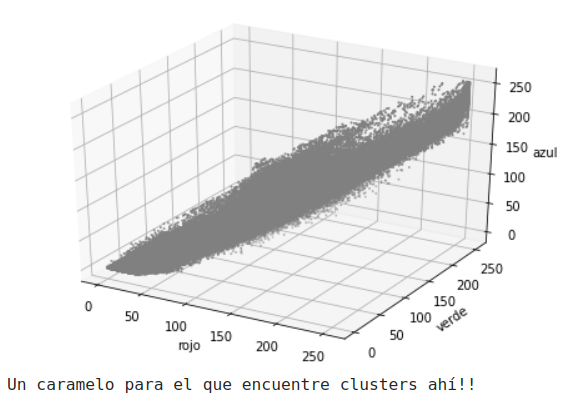

**Clustering** k-Medias (No supervisado)

In [ ]:
from sklearn.cluster import KMeans
# Número de clusters buscado
n_clust = 3
X=data0[:,1:4]
df_km = pd.DataFrame(X, columns=["rojo","verde","azul"])

km = KMeans(n_clusters=n_clust)
km.fit(df_km) #utiliza 3 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  308739313.39458174


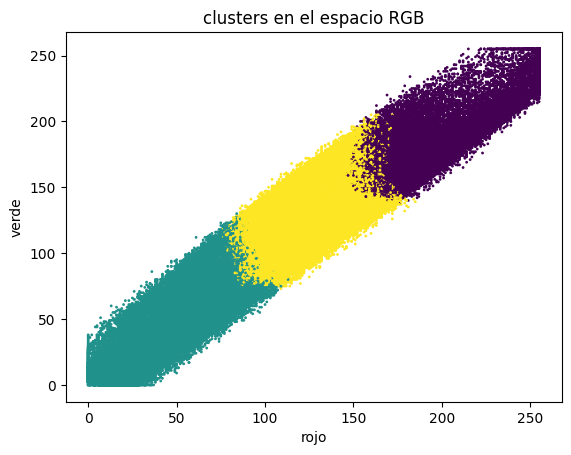

In [ ]:
variables=["rojo","verde","azul"]

variable1=variables[0]
variable2=variables[1]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c=clusters, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.title('clusters en el espacio RGB')
plt.show()

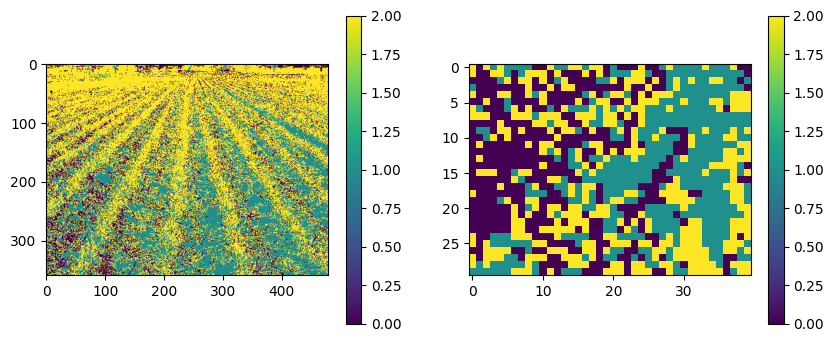

In [ ]:
img_clusters=km.labels_.reshape(cant_filas,cant_columnas)
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(img_clusters)#,cmap='Set1') #[50:100,5:100]
plt.colorbar()
plt.subplot(122)
plt.imshow(img_clusters[280:310,40:80])#,cmap='Set1') #[50:100,5:100]
plt.colorbar()
plt.show()

Como expertos de dominio... tienen sentido los clusters que encontró?
- que variable o causa latente comandó la separación de los clusters?
- ideas para resolverlo?

### Clasificación supervisada-semisupervisada

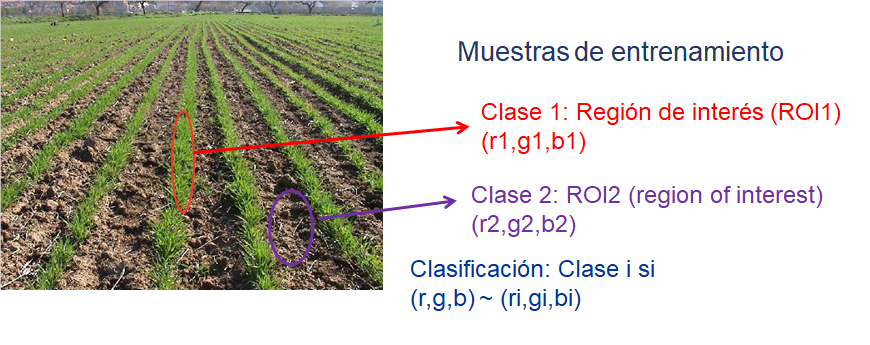

### k-nearest neibours -- k-vecinos más cercanos

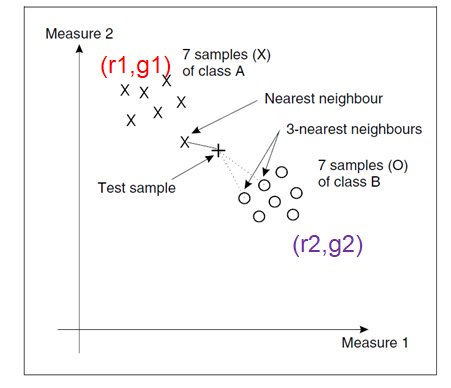

### Semi supervisado: Etiquetado de algunos pixeles:
**Selección de cada ROI (Region of interest/Regiones de interés)**

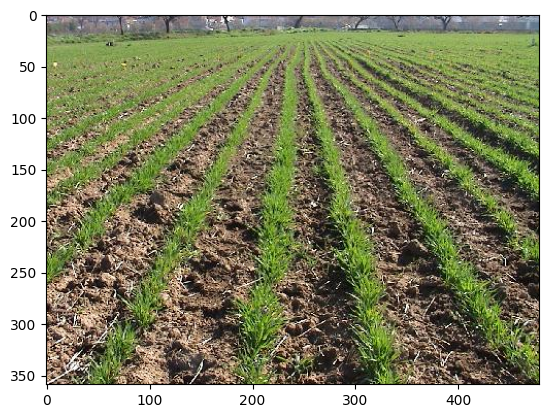

In [ ]:
plt.imshow(campo)
plt.show()

Elegimos las regiones de entrenamiento y pueden reemplazarse por el que les sigue

In [ ]:
roi1=(136, 241, 47, 106)#suelo
roi2=(192, 269, 33, 56) #pasto
roi3=(145, 1, 121, 14)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')

En cada ROI se guarda: (columna, fila, anchocol, anchofila)


In [ ]:
rois=[roi1,roi2,roi3]

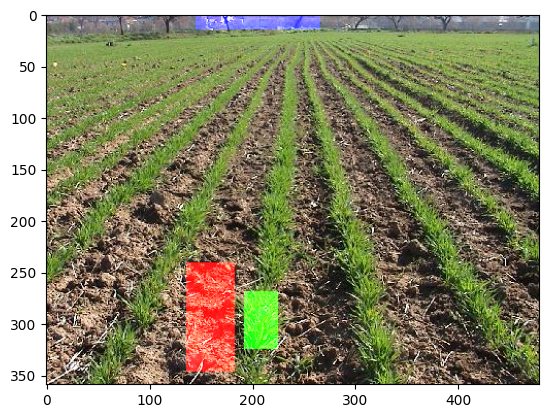

Rosa: suelo, Verde: pasto, Celeste: fondo


In [ ]:
campo_rois=campo.copy()

for i in range(3):
  roi=rois[i]
  f1=roi[1]
  ff=roi[1]+roi[3]
  c1=roi[0]
  cf=roi[0]+roi[2]
  campo_rois[f1:ff,c1:cf,i]=255

plt.imshow(campo_rois)
plt.show()
print('Rosa: suelo, Verde: pasto, Celeste: fondo')

In [ ]:
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')
target=np.zeros(cantidad,dtype='int')
cuenta=0
for i in range(3):
    roi=rois[i]

    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1:4]=campo[fil,col,:]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","rojo","verde","azul","etiqueta"])
print(df_etiquetado.shape)
print('Base de pixeles etiquetados:')
df_etiquetado.head()

8524
(8524, 5)
Base de pixeles etiquetados:


pixel_id  rojo  verde  azul  etiqueta
0    115575   101    104    77         1
1    115576   111    110    90         1
2    115577   104     97    89         1
3    115578    34     26    23         1
4    115579    29     22    16         1

**Graficamos sólo los pixeles etiquetados (roi1,2 y 3: entrenamiento) en el escpacio 3D RGB**

cantidad de muestras etiquetadas: 8524
cantidad de clases etiquetadas: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


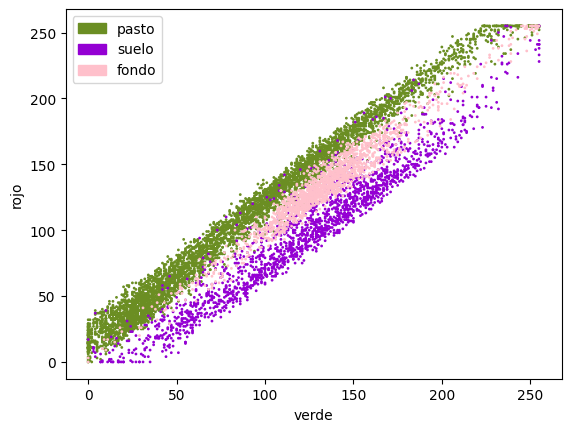

In [ ]:
colores=['olivedrab','darkviolet','pink']
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[0]

f1 = df_etiquetado[variable1].values
f2 = df_etiquetado[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de muestras etiquetadas:',l)
print('cantidad de clases etiquetadas:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    if(f3[k]==1):
        asignar.append(colores[0])
    elif (f3[k]==2):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

In [ ]:
fig =plt.figure()
ax = Axes3D(fig)

ax.scatter(df_etiquetado[variables[0]].values, df_etiquetado[variables[1]].values, df_etiquetado[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

<Figure size 640x480 with 0 Axes>

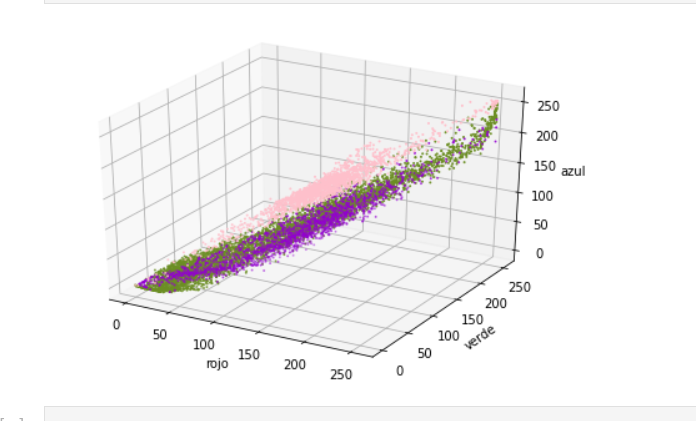

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
/tmp/ipython-input-1748868147.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` inste

   pixel_id  rojo  verde  azul  etiqueta
0         0   186    155   161         0
1         1   202    171   176         0
2         2   190    159   165         0
3         3   203    172   177         0
4         4   189    160   164         0
163437
171961
proporción de datos etiqueados: 0.049569379103401354


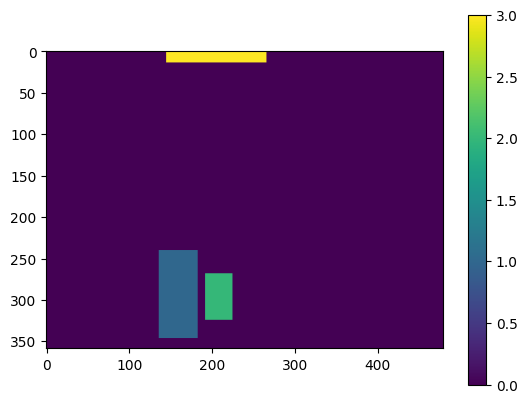

In [ ]:
#Base completa con etiquetas y no etiquetados en 0
a=campo.shape
df_completo=df.copy()
df_completo.astype(int)## cambiar el tipo de dato
df_completo['etiqueta']=0*df_completo['rojo']
#se asignan en el completo las etiquetas de ROIS
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.colorbar()
plt.show()

**Entrenamos un modelo k-Nearest Neighbor con los pixeles que etiquetamos  (roi1, 2 y 3)**

con Scikit Learn Elegimos el valor de k=5 (5 vecinos, es un hiper-parámetro)

In [ ]:
n_neighbors = 5
data_rgb=data[:,1:4]

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data_rgb, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data_rgb, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.97


### Clasificación

Clasifiquemos la imagen completa: Se clasifican todos usando el modelo entrenado

In [ ]:
X=data0[:,1:4]
y_pred=knn.predict(X)
clasif=y_pred.reshape(cant_filas,cant_columnas)
print(knn.predict([[40, 80, 40]]))

[2]


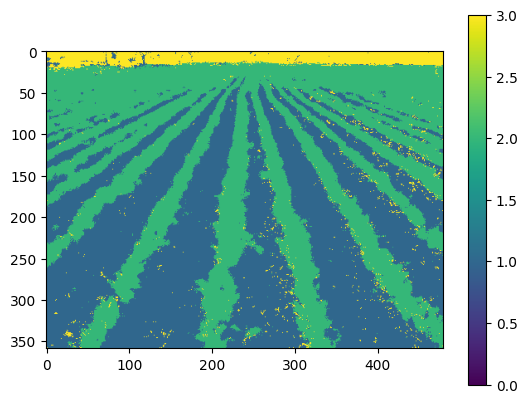

In [ ]:
clasif[0,0]=0 #sólo para unificar paletas (con 4 colores)
plt.imshow(clasif)
plt.colorbar()
plt.show()

#### OPCIONAL: Mejora de la clasificación: co-learning/training

Usando conocimiento de dominio: en imágenes, por ejemplo, la información espacial

* Filtro o algoritmo de modas (puede ser iterado)
* Moda: es el valor más repetido

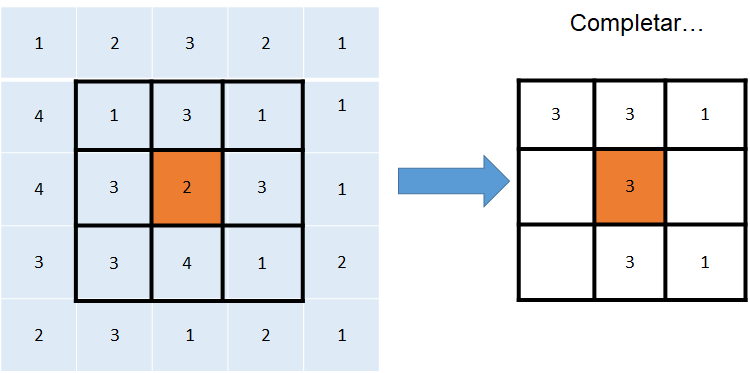

In [ ]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)

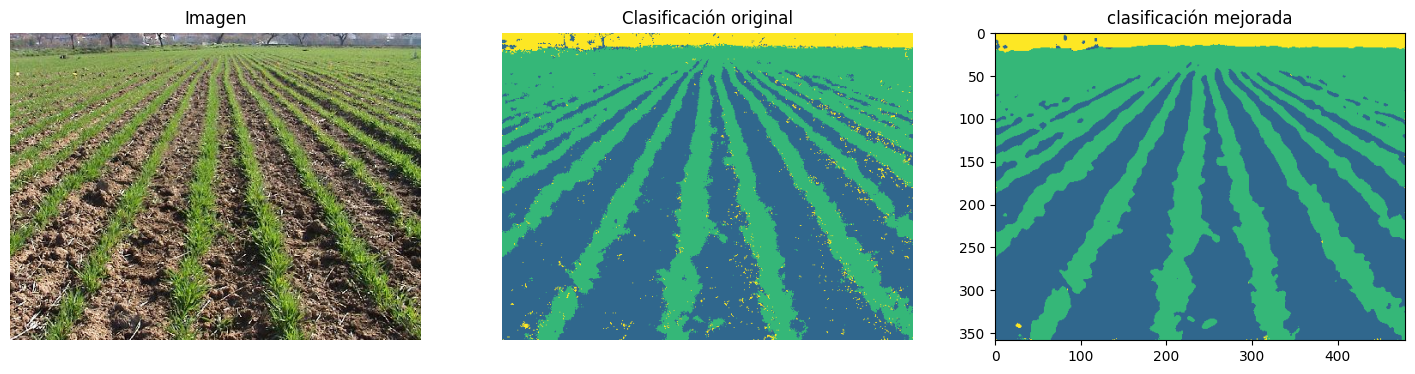

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(campo)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

### Self-learning: Asignación progresiva

**Utilizamos algún criterio para incrementar la muestra de entrenamiento de manera progresiva**

Elegimos comparar 5 vecinos con 16 vecinos más cercanos, si coincide lo agrega a la muestra de entrenamiento.

In [ ]:
props=[]

### Loop 0

In [ ]:
##loop 0
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 163437
proporción de datos sin etiquetar: 0.9504306208965987
proporciones: [0.9504306208965987]


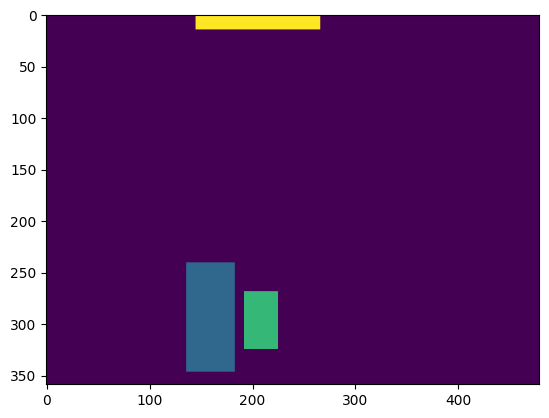

In [ ]:
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

### Se definen los dos clasificadores:

In [ ]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)

n_neighbors = 16
knn16 = KNeighborsClassifier(n_neighbors)

### Loop 1

 Se entrenan en los lugares etiquetados, se predice con ambos y se buscan coincidencias. Sólo se etiquetan los que coinciden

In [ ]:
##loop 1
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])

r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

/tmp/ipython-input-2448145935.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]


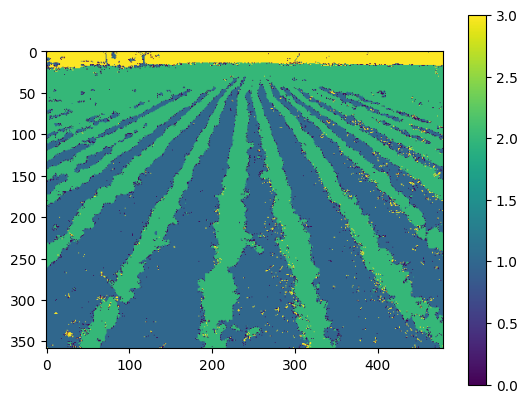

In [ ]:
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()

Cálculo de los nuevos etiquetados y porcentaje de etiquetados acumulados

In [ ]:
##loop 1
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 4835
proporción de datos sin etiquetar: 0.028116840446380284
proporciones: [0.9504306208965987, 0.028116840446380284]


### Loop 2

**Se entrena de nuevo los clasificadores con las muetras de entrenamiento actualizadas** y se usa el mismo criterio para etiquetar nuevos datos

comparar ambos clasificadores (knn 5 vecinos con knn 16 vecinos, en este caso), si coincide lo agrega a la muestra de entrenamiento y así cada loop hasta etiquetar todos o con límite de iteraciones...

In [ ]:
##loop 2
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

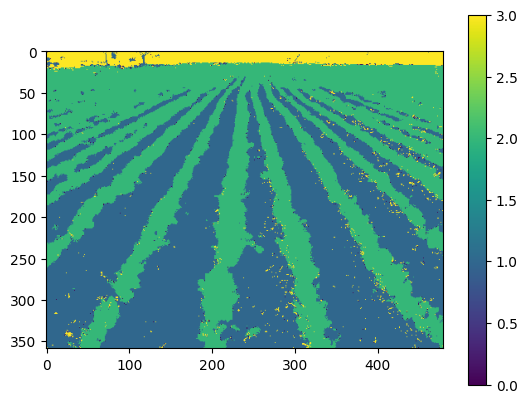

In [ ]:
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()

In [ ]:
##loop 2
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)
nnet=sum(lug_no_etiq)
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 671
proporción de datos sin etiquetar: 0.003902047557294968
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968]


In [ ]:
##loop 3
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

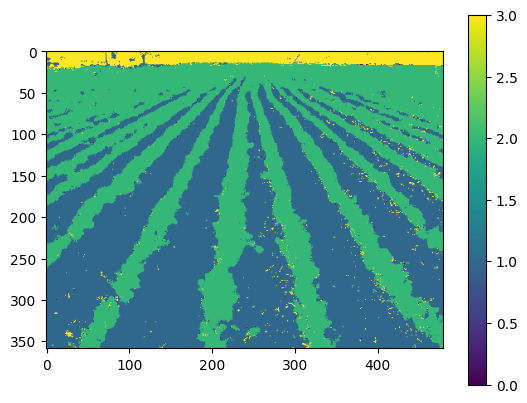

In [ ]:
##loop 3
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()


In [ ]:
##loop 3
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 268
proporción de datos sin etiquetar: 0.0015584929140909857
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857]


In [ ]:
##loop 4
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

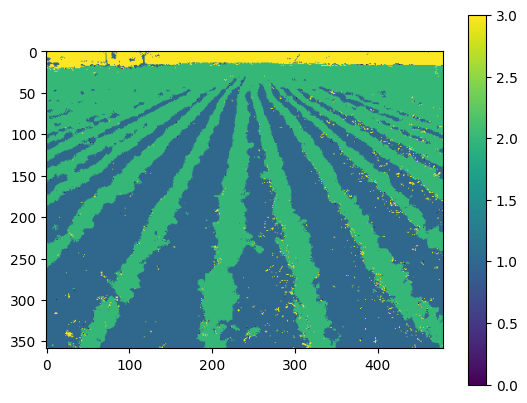

In [ ]:
##loop 4
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()


In [ ]:
##loop 4
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 221
proporción de datos sin etiquetar: 0.0012851751269183128
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128]


In [ ]:
##loop 5
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

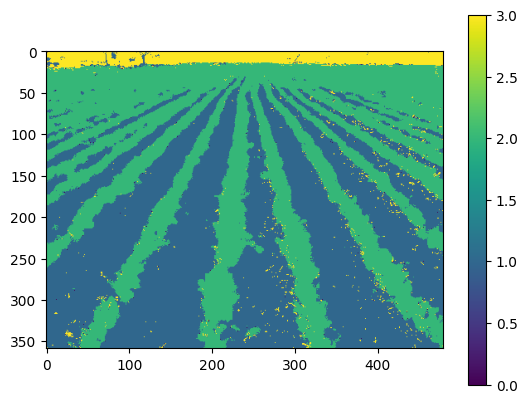

In [ ]:
##loop 5
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()

In [ ]:
##loop 5
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 193
proporción de datos sin etiquetar: 0.0011223475090282099
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128, 0.0011223475090282099]


In [ ]:
##loop 6
knn.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
knn16.fit(data0[lug_etiq,1:4], df_completo.etiqueta.values[lug_etiq])
r1s= knn.predict(data0[:,1:4])
r2s= knn16.predict(data0[:,1:4])
coincidencia=(r1s==r2s)

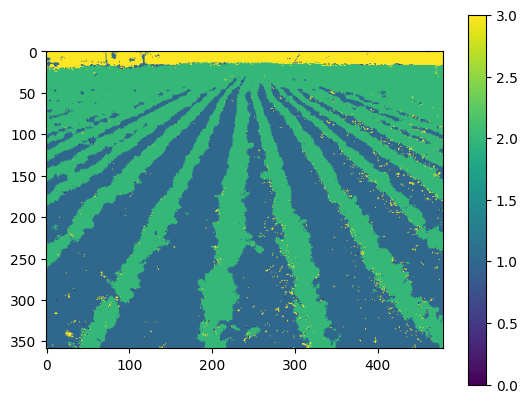

In [ ]:
##loop 6
df_completo.etiqueta[lug_no_etiq & coincidencia]=r1s[lug_no_etiq & coincidencia]
clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_iter)
plt.colorbar()
plt.show()


In [ ]:
##loop 6
lug_no_etiq=(df_completo.etiqueta==0)
lug_etiq=(df_completo.etiqueta!=0)
#print(lug_no_etiq)##loop 3
nnet=sum(lug_no_etiq)##loop 3
print('cantidad de no etiquetados,',nnet)
prop=nnet/cant_pixeles
props.append(prop)
print('proporción de datos sin etiquetar:',prop)
print('proporciones:',props)

cantidad de no etiquetados, 189
proporción de datos sin etiquetar: 0.0010990864207581952
proporciones: [0.9504306208965987, 0.028116840446380284, 0.003902047557294968, 0.0015584929140909857, 0.0012851751269183128, 0.0011223475090282099, 0.0010990864207581952]


**Si no se tuvieron buenos resultados puede ser por muchos motivos:**
* el algoritmo puede fallar y no converger a los aglomerados
* las características consideradas no son suficientes o no son las adecuadas, por ejemplo.